In [102]:
# Importing library and modules necessary for the code
from mpl_toolkits.axes_grid1 import host_subplot
from mpl_toolkits import axisartist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import datetime as dt
from pandas_datareader import data as pdr
from scipy.stats import norm, lognorm, stats
from scipy.stats.mstats import mquantiles
from scipy.stats import skew, kurtosis

## Portfolio consisting of stocks

In [166]:
stock_list = ['GOOGL','FB','AAPL']           # stock chosen
enddate= dt.datetime(2021,9,15)                  # time of this moment 
startdate = enddate - dt.timedelta(days=729) # start date 2 years ago

In [167]:
def get_data(stocks, start, end):
    stock_data = pdr.get_data_yahoo(stocks, start ,end)  # yahoo finance function that get the stock market data
    stock_data = stock_data['Close']                     
    returns = stock_data.pct_change()                    # simple return
    mean_returns = returns.mean()                        
    cov_matrix = returns.cov()                           
    return mean_returns, cov_matrix, stock_data

mean_returns, cov_matrix, stock_data = get_data(stock_list ,startdate, enddate)
date=list(stock_data.index)                              # list of the date

In [168]:
cov_matrix # covariance matrix

Symbols,GOOGL,FB,AAPL
Symbols,,,
GOOGL,0.000391,0.000350,0.000326
FB,0.000350,0.000557,0.000391
AAPL,0.000326,0.000391,0.000545


In [169]:
pd.DataFrame(mean_returns, columns=['Mean']) # mean vector

,Mean
Symbols,
GOOGL,0.001895
FB,0.001646
AAPL,0.002250


In [170]:
stock_data # closing price

Symbols,GOOGL,FB,AAPL
Date,,,
2019-09-17,1229.880005,188.080002,55.174999
2019-09-18,1232.650024,188.139999,55.692501
2019-09-19,1238.750000,190.139999,55.240002
2019-09-20,1229.839966,189.929993,54.432499
2019-09-23,1234.689941,186.820007,54.680000
...,...,...,...
2021-09-09,2870.820068,378.000000,154.070007
2021-09-10,2817.520020,378.690002,148.970001
2021-09-13,2846.649902,376.510010,149.550003


## Stock performance

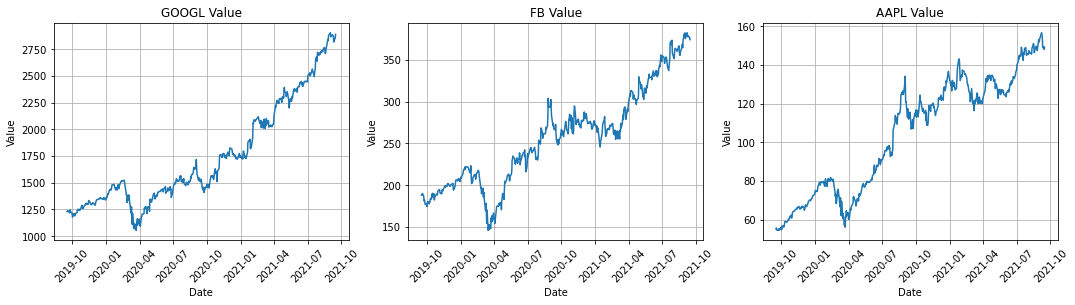

In [171]:
for i in range(0,len(stock_list),3):
    fig, axs = plt.subplots(1, 3, figsize=(18, 4))
    y=stock_data.iloc[:,i]
    axs[0].plot(date,y)
    axs[0].set(xlabel='Date', ylabel='Value')
    for tick in axs[0].get_xticklabels():
            tick.set_rotation(45)
    axs[0].set_title(f'{stock_list[i]} Value')
    axs[0].grid()
    if i+1<len(stock_list):
        y=stock_data.iloc[:,i+1]
        axs[1].plot(date,y)
        axs[1].set(xlabel='Date', ylabel='Value')
        for tick in axs[1].get_xticklabels():
            tick.set_rotation(45)
        axs[1].set_title(f'{stock_list[i+1]} Value')
        axs[1].grid()
    if i+2<len(stock_list):   
        y=stock_data.iloc[:,i+2]
        axs[2].plot(date,y)
        axs[2].set(xlabel='Date', ylabel='Value')
        for tick in axs[2].get_xticklabels():
            tick.set_rotation(45)
        axs[2].set_title(f'{stock_list[i+2]} Value')
        axs[2].grid()
    plt.show()

## Daily returns per day

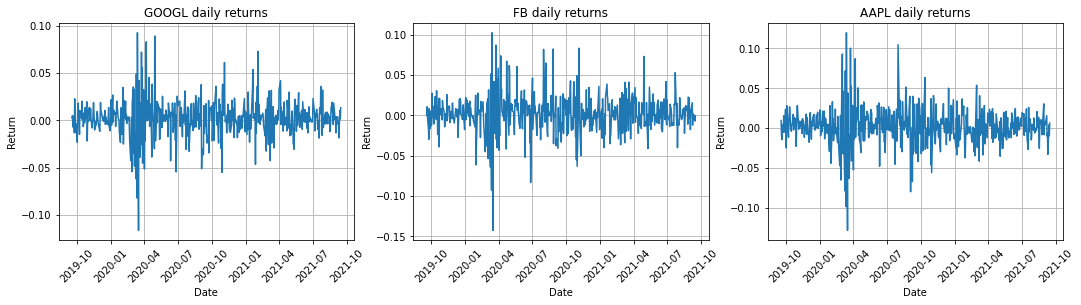

In [172]:
for i in range(0,len(stock_list),3):
    fig, axs = plt.subplots(1, 3, figsize=(18, 4))
    y=stock_data.iloc[:,i].pct_change()
    axs[0].plot(date,y)
    axs[0].set(xlabel='Date', ylabel='Return')
    for tick in axs[0].get_xticklabels():
            tick.set_rotation(45)
    axs[0].set_title(f'{stock_list[i]} daily returns')
    axs[0].grid()
    if i+1<len(stock_list):
        y=stock_data.iloc[:,i+1].pct_change()
        axs[1].plot(date,y)
        axs[1].set(xlabel='Date', ylabel='Return')
        for tick in axs[1].get_xticklabels():
            tick.set_rotation(45)
        axs[1].set_title(f'{stock_list[i+1]} daily returns')
        axs[1].grid()
    if i+2<len(stock_list):   
        y=stock_data.iloc[:,i+2].pct_change()
        axs[2].plot(date,y)
        axs[2].set(xlabel='Date', ylabel='Return')
        for tick in axs[2].get_xticklabels():
            tick.set_rotation(45)
        axs[2].set_title(f'{stock_list[i+2]} daily returns')
        axs[2].grid()
    plt.show()

### Histogram of the frequency of the daily returns

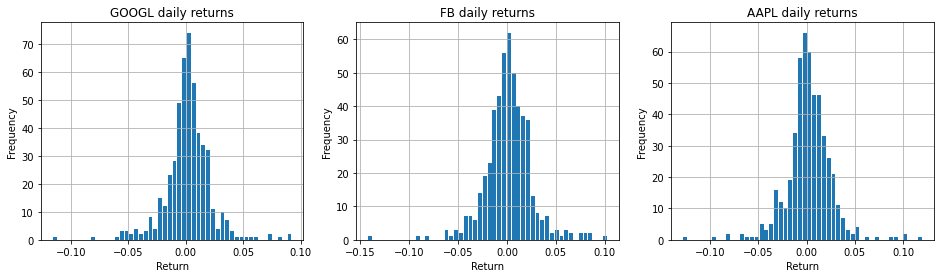

In [173]:
for i in range(0,len(stock_list),3):
    fig, axs = plt.subplots(1, 3, figsize=(16, 4))
    y = stock_data.iloc[:,i].pct_change()
    axs[0].hist(y, bins=50, rwidth=0.8)
    axs[0].set(xlabel='Return', ylabel='Frequency')
    axs[0].set_title(f'{stock_list[i]} daily returns')
    axs[0].grid()
    if i+1<len(stock_list):
        y = stock_data.iloc[:,i+1].pct_change()
        axs[1].hist(y, bins=50, rwidth=0.8)
        axs[1].set(xlabel='Return', ylabel='Frequency')
        axs[1].set_title(f'{stock_list[i+1]} daily returns')
        axs[1].grid()
    if i+2<len(stock_list):   
        y = stock_data.iloc[:,i+2].pct_change()
        axs[2].hist(y, bins=50, rwidth=0.8)
        axs[2].set(xlabel='Return', ylabel='Frequency')
        axs[2].set_title(f'{stock_list[i+2]} daily returns')
        axs[2].grid()
    plt.show()

## Finding the normal fit for each company returns

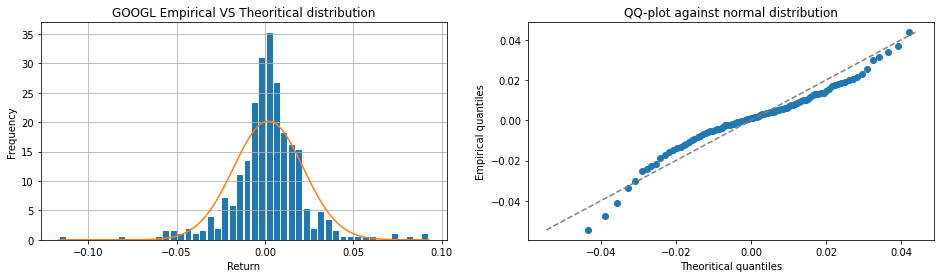

The p-value is 7.284019693047627e-05.
You should reject the hypothesis!


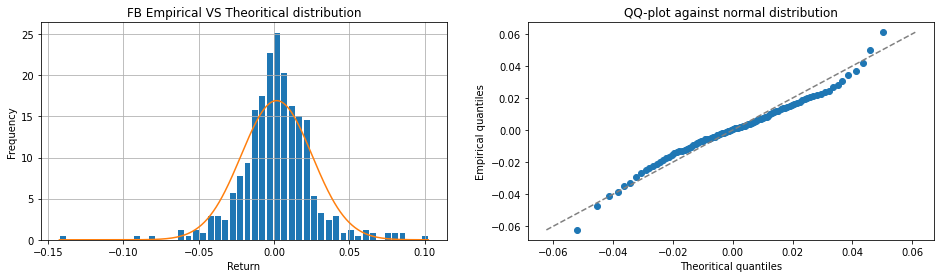

The p-value is 0.014065146767710097.
You should reject the hypothesis!


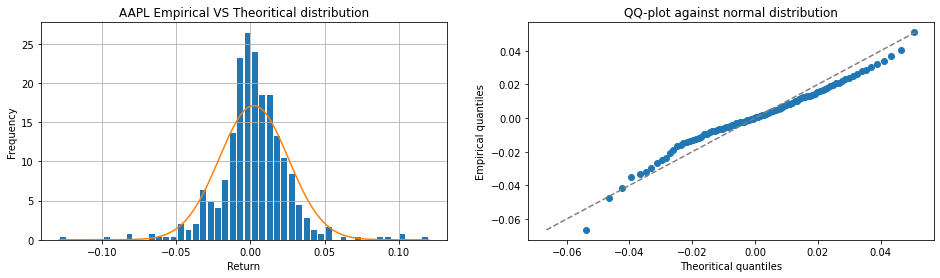

The p-value is 0.0008053292240730023.
You should reject the hypothesis!


In [174]:
medie=[]                          # mean vector calculated from the fit command
std=[]                      # standard deviation calculatr from the fit command
kurt=[]                                         # kurtosis vector of the return
sk=[]                                           # skewness vector of the return
for i in range(0,len(stock_list)):
    fig, axs = plt.subplots(1, 2, figsize=(16, 4))
    y = stock_data.iloc[:,i].pct_change().dropna()
    loc, scale = norm.fit(y) # fitting the data and finding the mean and the std
    medie.append(loc)
    std.append(scale)
    kurt.append(kurtosis(y))
    sk.append(skew(y))
    m, M = min(y), max(y)
    _x = np.linspace(m, M, 500)                           
    _y = norm.pdf(_x, loc=loc, scale=scale)
    axs[0].hist(y, bins=50, rwidth=0.8, density='normal')
    axs[0].plot(_x,_y)
    axs[0].set(xlabel='Return', ylabel='Frequency')
    axs[0].set_title(f'{stock_list[i]} Empirical VS Theoritical distribution')
    axs[0].grid()
    
    # Empirical quantiles
    y_diff_qs = mquantiles(y, np.arange(0.01, 0.99, 0.01))
    # Theoretical quantiles
    norm_qs   = mquantiles(norm.rvs(loc=loc, scale=scale, size=10000), np.arange(0.01, 0.99, 0.01))

    # Q-Q plot
    axs[1].scatter(norm_qs, y_diff_qs)
    x_lim = min(y_diff_qs), max(y_diff_qs)
    axs[1].plot(x_lim, x_lim, ls="--", c=".5")
    axs[1].set(xlabel='Theoritical quantiles', ylabel='Empirical quantiles')
    axs[1].set_title("QQ-plot against normal distribution")

    plt.show()
    normed_y = (y-loc)/scale
    D, pvalue = stats.kstest(normed_y,'norm')          #kolmogorov-smirnov test
    print(f'The p-value is {pvalue}.')
    if pvalue<0.05:
        print('You should reject the hypothesis!')
    else:
        print('You can accept the hypothesis!')

In [175]:
data_matrix = pd.DataFrame([list(mean_returns), np.diag(cov_matrix), sk, kurt],columns=stock_list, index=['Mean', 'Variance', 'Skewness', 'Kurtosis'])
display(data_matrix)

,GOOGL,FB,AAPL
Mean,0.001895,0.001646,0.002250
Variance,0.000391,0.000557,0.000545
Skewness,-0.191389,-0.143477,-0.031473
Kurtosis,5.645010,4.778450,5.633542


In [176]:
data_cal_matrix = pd.DataFrame([medie, np.square(std)],columns=stock_list, index=['Mean', 'Variance'])
display(data_cal_matrix)

,GOOGL,FB,AAPL
Mean,0.001895,0.001646,0.002250
Variance,0.000390,0.000556,0.000544


In [177]:
#Portfolio Weights
w=[0.3,0.1,0.6]           # weights chosen randomly
w_balanced=[1/3,1/3,1/3]  # balanced weights

## Correlation beetween companies

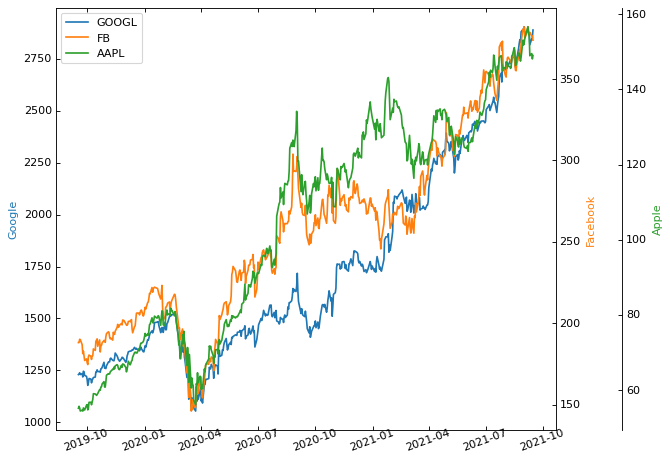

In [178]:
plt.figure(figsize=[10,7],dpi=80)
host = host_subplot(111, axes_class=axisartist.Axes)
plt.subplots_adjust(right=0.75)

axs1 = host.twinx()
axs2 = host.twinx()

axs2.axis["right"] = axs2.new_fixed_axis(loc="right", offset=(60, 0))
axs1.axis["right"].toggle(all=True)
axs2.axis["right"].toggle(all=True)

a1, = host.plot(date, stock_data.iloc[:,0], label="GOOGL")
a2, = axs1.plot(date, stock_data.iloc[:,1], label="FB")
a3, = axs2.plot(date, stock_data.iloc[:,2], label="AAPL")

for tick in host.get_xticklabels():
            tick.set_rotation(45)
host.set_ylabel("Google")
axs1.set_ylabel("Facebook")
axs2.set_ylabel("Apple")

host.legend()

host.axis["left"].label.set_color(a1.get_color())
axs1.axis["right"].label.set_color(a2.get_color())
axs2.axis["right"].label.set_color(a3.get_color())

host.axis["bottom"].major_ticklabels.set_rotation(20)

plt.show()

In [179]:
a=np.array([stock_data['AAPL']])
f=np.array([stock_data['FB']])
g=np.array([stock_data['GOOGL']])
data=np.concatenate((g, f, a))

In [180]:
corr_matrix = pd.DataFrame(np.corrcoef(data),index=stock_list, columns=stock_list)
display(corr_matrix.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1))

,GOOGL,FB,AAPL
GOOGL,1.000000,0.944087,0.874877
FB,0.944087,1.000000,0.935516
AAPL,0.874877,0.935516,1.000000


In [181]:
# function that return the 99% VaR if alpha is not given
def mcVaR(returns, alpha=1):
    return np.round(np.percentile(returns, alpha, interpolation='nearest'),2)

In [182]:
mc_sims=range(10,5010,10) # vector of numbers of simulation

## Monte Carlo simulations

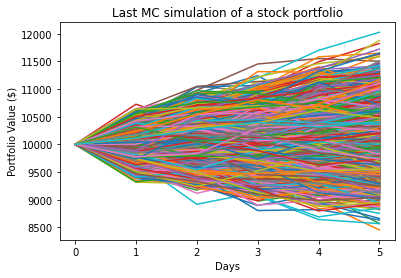

In [183]:
VaR=[]                         # list of the VaR calculated for every simulation
initial_portfolio = 10000      # initial value of the portfolio
T = 5                    # number of days
# Cholesky decomposition of the covariance matrix
L = np.linalg.cholesky(cov_matrix) 

mean = np.full(shape=(T, len(w)), fill_value=mean_returns) # mean returns matrix
mean = mean.T # transpose

for i in range(0,len(mc_sims)):
    # matrix of the portfolio: day, simulation
    portfolio_sims = np.full(shape=(T, mc_sims[i]), fill_value=0.0) 
    portfolio = np.full(shape=(T+1, mc_sims[i]), fill_value=0.0)
    # matrix of daily returns: stock, day, simulation
    daily_returns = np.full(shape=(len(w), T, mc_sims[i]), fill_value=0.0) 
    
    for m in range(0, mc_sims[i]):                         # loop simulation
        # random standard multivariate normal data
        Z = np.random.normal(size=(T, len(w)))    
        # daily returns calculated with the right distribution
        daily_returns [:, :, m] = mean + np.inner(L,Z)     
        # portofolio value for each day
        portfolio_sims[:, m] = np.cumprod(np.inner(w, daily_returns[:, :, m].T)+1)*initial_portfolio
        portfolio[:, m] = np.insert(portfolio_sims[:,m],0,initial_portfolio)
    # value of the portfolio in the last day
    portResults = pd.Series(portfolio_sims[-1,:]) 
    P_L= initial_portfolio - portResults         # Profit / Loss vector
    VaR.append(-mcVaR(P_L))                      # VaR 99% 5-day calculated 
    # print('VaR ${}'.format(round(VaR[i],2)))
    
plt.plot(portfolio)         # plot of the last simulation --> 5000 possibility
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('Last MC simulation of a stock portfolio')
plt.show()

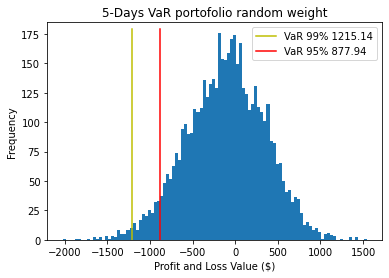

In [184]:
plt.hist(P_L, bins=100)
VaR_99 = -VaR[-1]
VaR_95 = mcVaR(P_L,5)
plt.axvline(VaR_99, color = 'y', ymax = 0.97, label = f'VaR 99% {-VaR_99}')
plt.axvline(VaR_95, color = 'r', ymax = 0.97, label = f'VaR 95% {-VaR_95}')
plt.xlabel('Profit and Loss Value ($)')
plt.ylabel('Frequency')
plt.title('5-Days VaR portofolio random weight')
plt.legend()
plt.show()

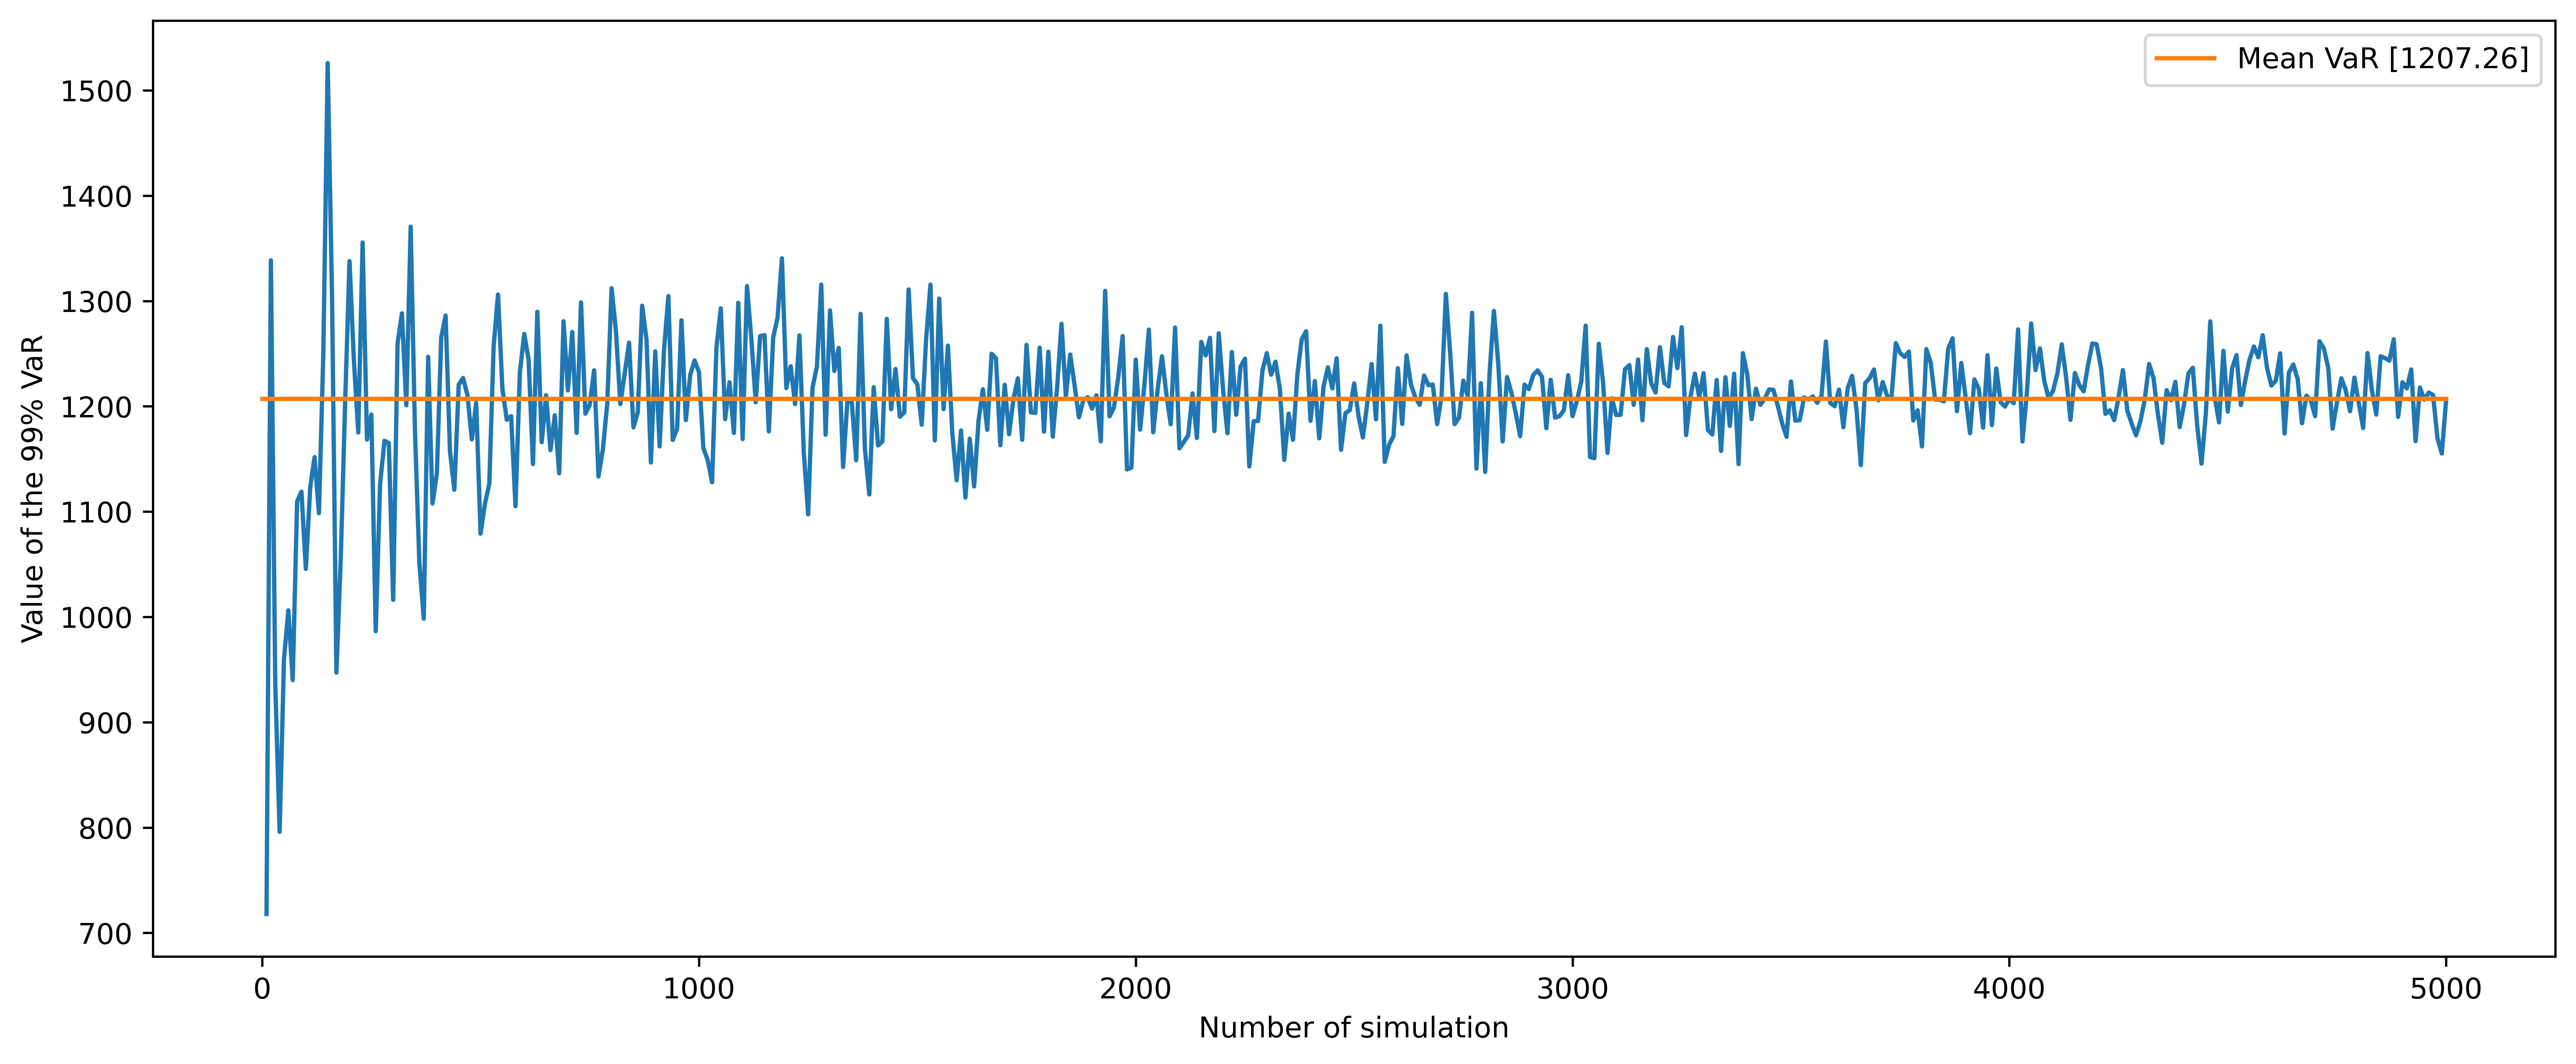

In [141]:
figure(figsize=(15, 6), dpi=800)
plt.xlabel('Number of simulation')
plt.ylabel('Value of the 99% VaR')
plt.plot(mc_sims,VaR)
mean_VaR = [np.round(sum(VaR)/len(VaR),2)]
plt.plot([0,5000], [mean_VaR, mean_VaR], label = f'Mean VaR {mean_VaR}')
plt.legend()
plt.show()

### Balanced portfolio

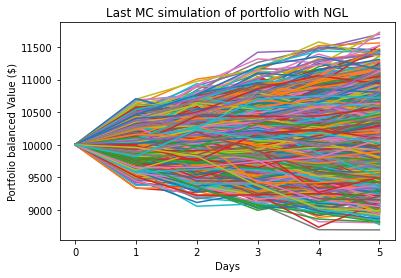

In [142]:
#Monte Carlo simulations of the balanced portfolio 
VaR_bal=[]                    # list of the VaR calculated for every simulation
initial_portfolio_bal = 10000 # initial value of the portfolio
T = 5                         # number of days
L = np.linalg.cholesky(cov_matrix)

mean = np.full(shape=(T, len(w)), fill_value=mean_returns) # mean returns matrix
mean = mean.T # transpose

for i in range(0,len(mc_sims)):
    # matrix of the portfolio: day, simulation
    portfolio_sims_bal = np.full(shape=(T, mc_sims[i]), fill_value=0.0)
    portfolio_bal = np.full(shape=(T+1, mc_sims[i]), fill_value=0.0)
    # matrix of daily returns: stock, day, simulation
    daily_returns_bal = np.full(shape=(len(w_balanced), T, mc_sims[i]), fill_value=0.0)

    for m in range(0, mc_sims[i]):                           # loop simulation
        Z = np.random.normal(size=(T, len(w)))              
        daily_returns_bal [:, :, m] = mean + np.inner(L,Z)  
        # portofolio value for each day
        portfolio_sims_bal[:, m] = np.cumprod(np.inner(w_balanced, daily_returns_bal[:, :, m].T)+1)*initial_portfolio_bal
        portfolio_bal[:, m] = np.insert(portfolio_sims_bal[:,m],0,initial_portfolio_bal)
    
    portResults_bal = pd.Series(portfolio_sims_bal[-1,:])   
    P_L_bal= initial_portfolio_bal - portResults_bal    # Profit / Loss vector
    VaR_bal.append(-mcVaR(P_L_bal))                 # VaR 99% 5-day calculated 
    #print('VaR ${}'.format(round(VaR_bal[i],2)))

plt.plot(portfolio_bal)     # plot of the last simulation --> 5000 possibility
plt.ylabel('Portfolio balanced Value ($)')
plt.xlabel('Days')
plt.title('Last MC simulation of portfolio with NGL')
plt.show()

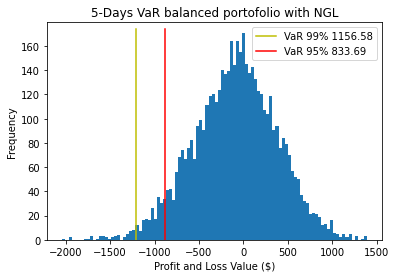

In [143]:
plt.hist(P_L, bins=100)
VaR_99_bal = -VaR_bal[-1]
VaR_95_bal = mcVaR(P_L_bal,5)
plt.axvline(VaR_99, color = 'y', ymax = 0.97, label = f'VaR 99% {-VaR_99_bal}')
plt.axvline(VaR_95, color = 'r', ymax = 0.97, label = f'VaR 95% {-VaR_95_bal}')
plt.xlabel('Profit and Loss Value ($)')
plt.ylabel('Frequency')
plt.title('5-Days VaR balanced portofolio with NGL')
plt.legend()
plt.show()

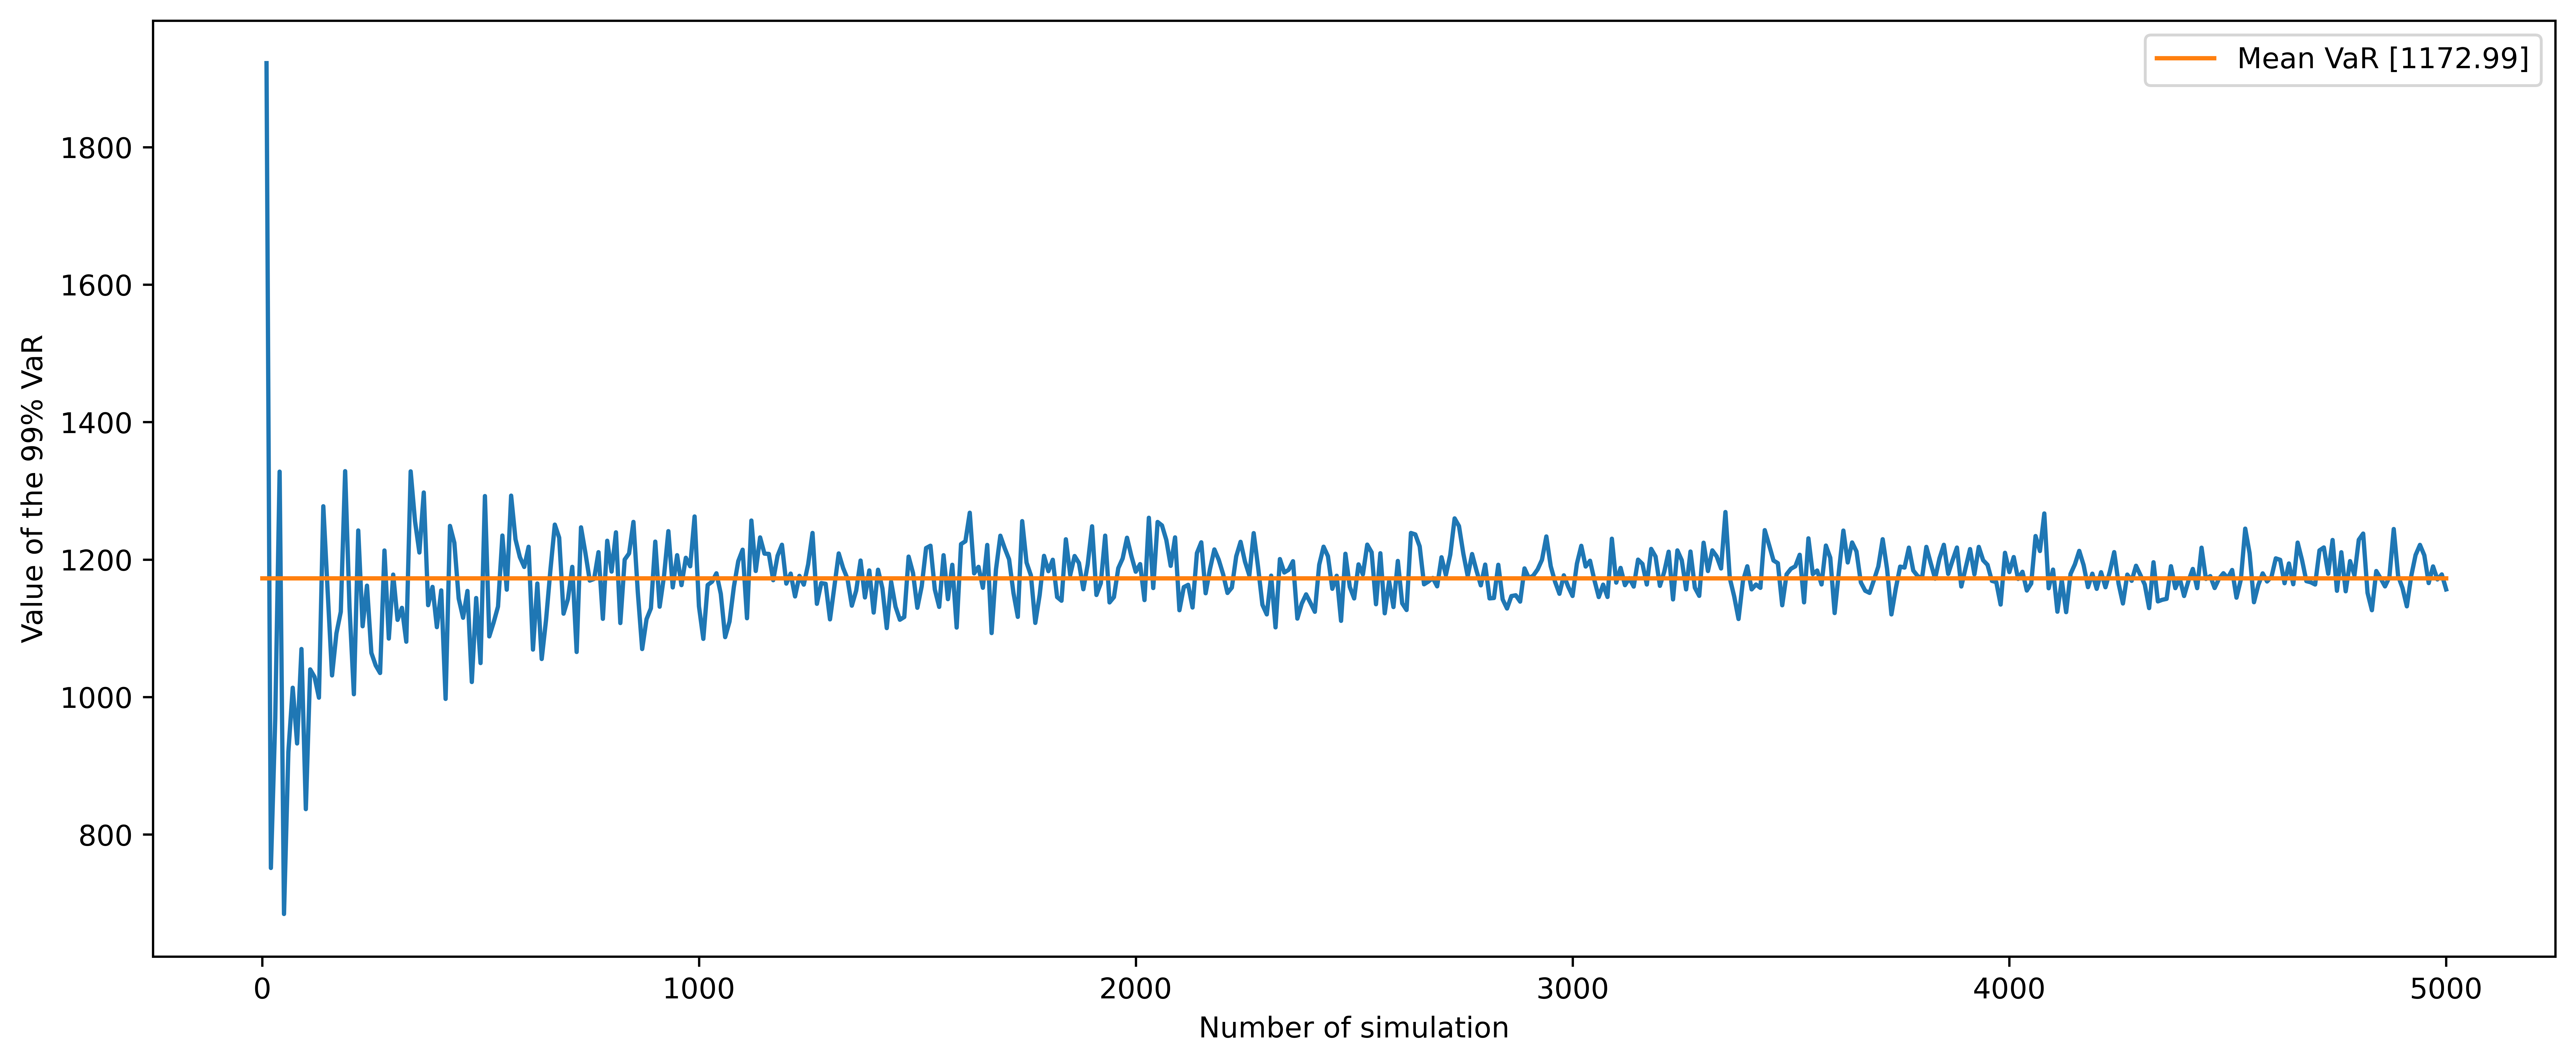

In [144]:
figure(figsize=(15, 6), dpi=800)
plt.xlabel('Number of simulation')
plt.ylabel('Value of the 99% VaR')
plt.plot(mc_sims,VaR_bal)
mean_VaR_bal = [np.round(sum(VaR_bal)/len(VaR_bal),2)]
plt.plot([0,5000], [mean_VaR_bal, mean_VaR_bal], label = f'Mean VaR {mean_VaR_bal}')
plt.legend()
plt.show()

 ## VaR with Model-Building approach

In [145]:
# Standard deviation for daily stock price, random weight
std_daily_price=np.multiply(w,std)*initial_portfolio

In [146]:
# 5-day 99% Var calculated for portfolio with a single stock
VaR_sing = 2.326*std_daily_price*np.sqrt(1)
sum(VaR_sing)

519.5876737562762

In [147]:
# Standard deviation for the portfolio with three stocks 
sigma_p=np.sqrt(sum(np.square(std_daily_price))+2*corr_matrix.iloc[0,1]*std_daily_price[0]*std_daily_price[1]+2*corr_matrix.iloc[0,2]*std_daily_price[0]*std_daily_price[2]+2*corr_matrix.iloc[1,2]*std_daily_price[1]*std_daily_price[2])

In [148]:
# 5-day 99% Var calculated for portfolio with the three stock
std_sum=sigma_p*2.326*np.sqrt(1)
std_sum

358.9270253807507

In [149]:
# Differences between the simulated var and the model building approach
abs(VaR_99)-abs(std_sum)

847.3829746192492

### Balanced portfolio

In [150]:
# Standard deviation for daily stock price, balanced weight
std_daily_price_bal=np.multiply(w_balanced,std)*initial_portfolio

In [151]:
# 5-day 99% Var calculated for portfolio with a single stock
VaR_sing_bal = 2.326*std_daily_price_bal*np.sqrt(5)
sum(VaR_sing_bal)

1159.0226030287067

In [152]:
# Standard deviation for the balanced portfolio with three stocks 
sigma_p_bal=np.sqrt(sum(np.square(std_daily_price_bal))+2*corr_matrix.iloc[0,1]*std_daily_price_bal[0]*std_daily_price_bal[1]+2*corr_matrix.iloc[0,2]*std_daily_price_bal[0]*std_daily_price_bal[2]+2*corr_matrix.iloc[1,2]*std_daily_price_bal[1]*std_daily_price_bal[2])

In [153]:
# 5-day 99% Var calculated for balanced portfolio with the three stock
std_sum_bal=sigma_p_bal*2.326*np.sqrt(5)
std_sum_bal

672.11664464394

In [154]:
# Differences between the simulated var and the model building approach
abs(VaR_99_bal)-abs(std_sum_bal)

484.4633553560599